In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_theme(style='white', palette='rainbow', font_scale=1.2)

In [3]:
data = pd.read_csv("data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

## Visualize Resp

In [5]:
fig = plt.figure(figsize=(20, 16))
data.loc[data.G3 < 12, 'G3_binary'] = 0
data.loc[data.G3 >= 12, 'G3_binary'] = 1
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_binary
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,0.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0.0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0.0


<Figure size 2000x1600 with 0 Axes>

<AxesSubplot: xlabel='G3_binary', ylabel='count'>

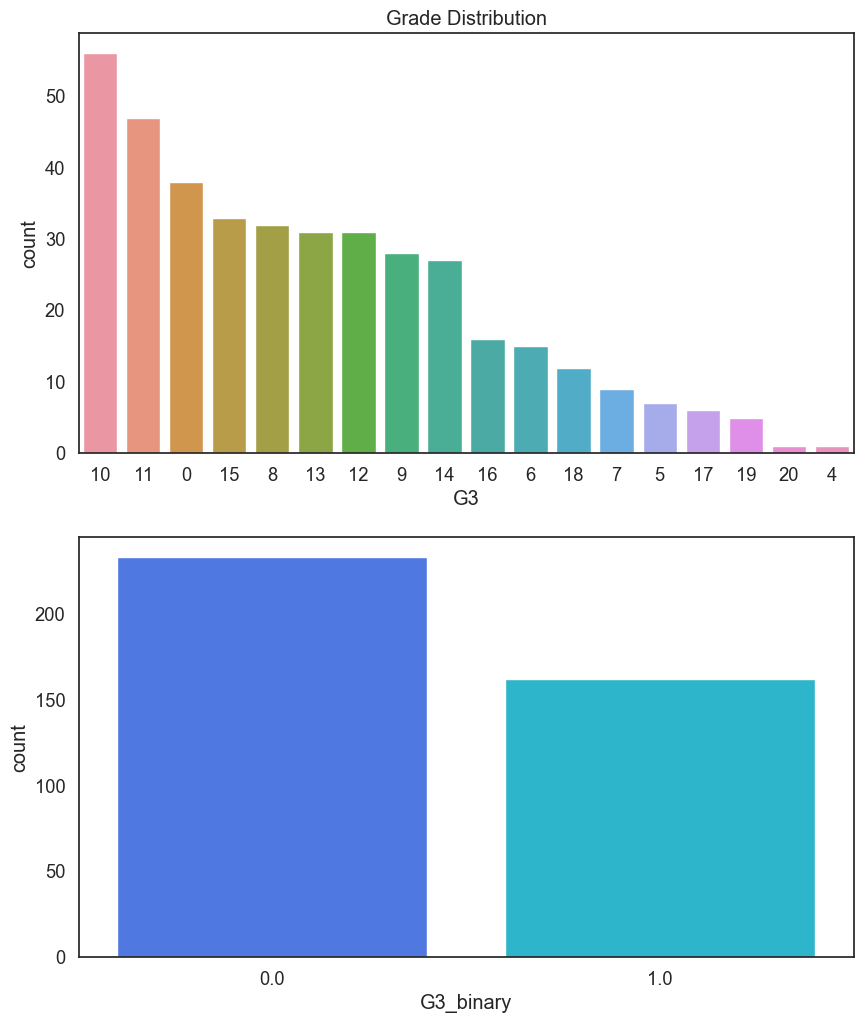

In [6]:
fig = plt.figure(figsize=(10, 12))
fig.add_subplot(2, 1, 1)
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index).set_title("Grade Distribution")
fig.add_subplot(2, 1, 2)
sns.countplot(x=data.G3_binary, order=data.G3_binary.value_counts().index)

In [7]:
# plt.figure(figsize=(25, 16))
# sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

### Study-related

Text(0.5, 1.0, 'Internet Access vs G3')

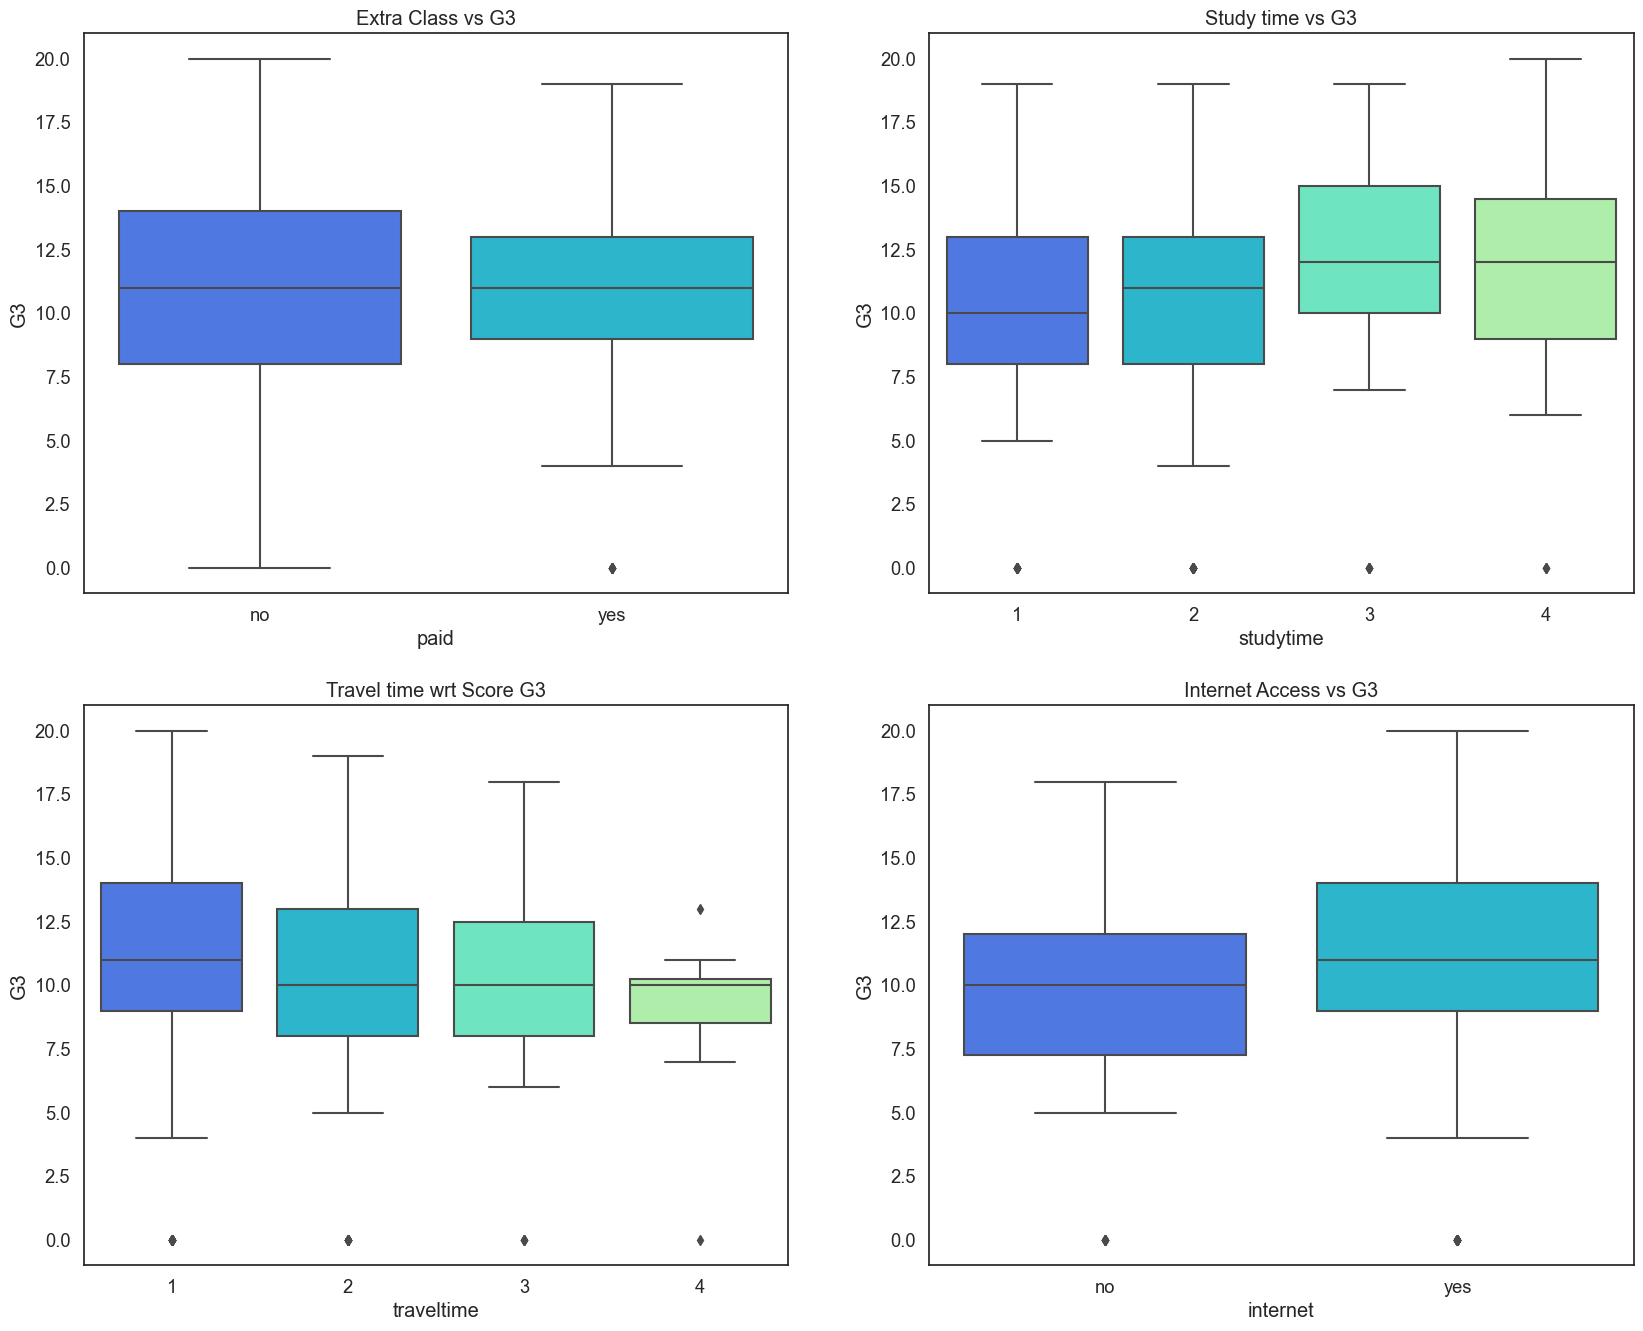

In [8]:
fig = plt.figure(figsize=(20, 16))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='paid', y='G3', data=data).set_title('Extra Class vs G3')

fig.add_subplot(2, 2, 2)
sns.boxplot(x='studytime', y='G3', data=data).set_title('Study time vs G3')

fig.add_subplot(2, 2, 3)
sns.boxplot(x='traveltime', y='G3', data=data).set_title('Travel time wrt Score G3')

fig.add_subplot(2, 2, 4)
sns.boxplot(x='internet', y='G3', data=data).set_title('Internet Access vs G3')

### Social Factors

Text(0.5, 1.0, 'Romantic Relation vs G3')

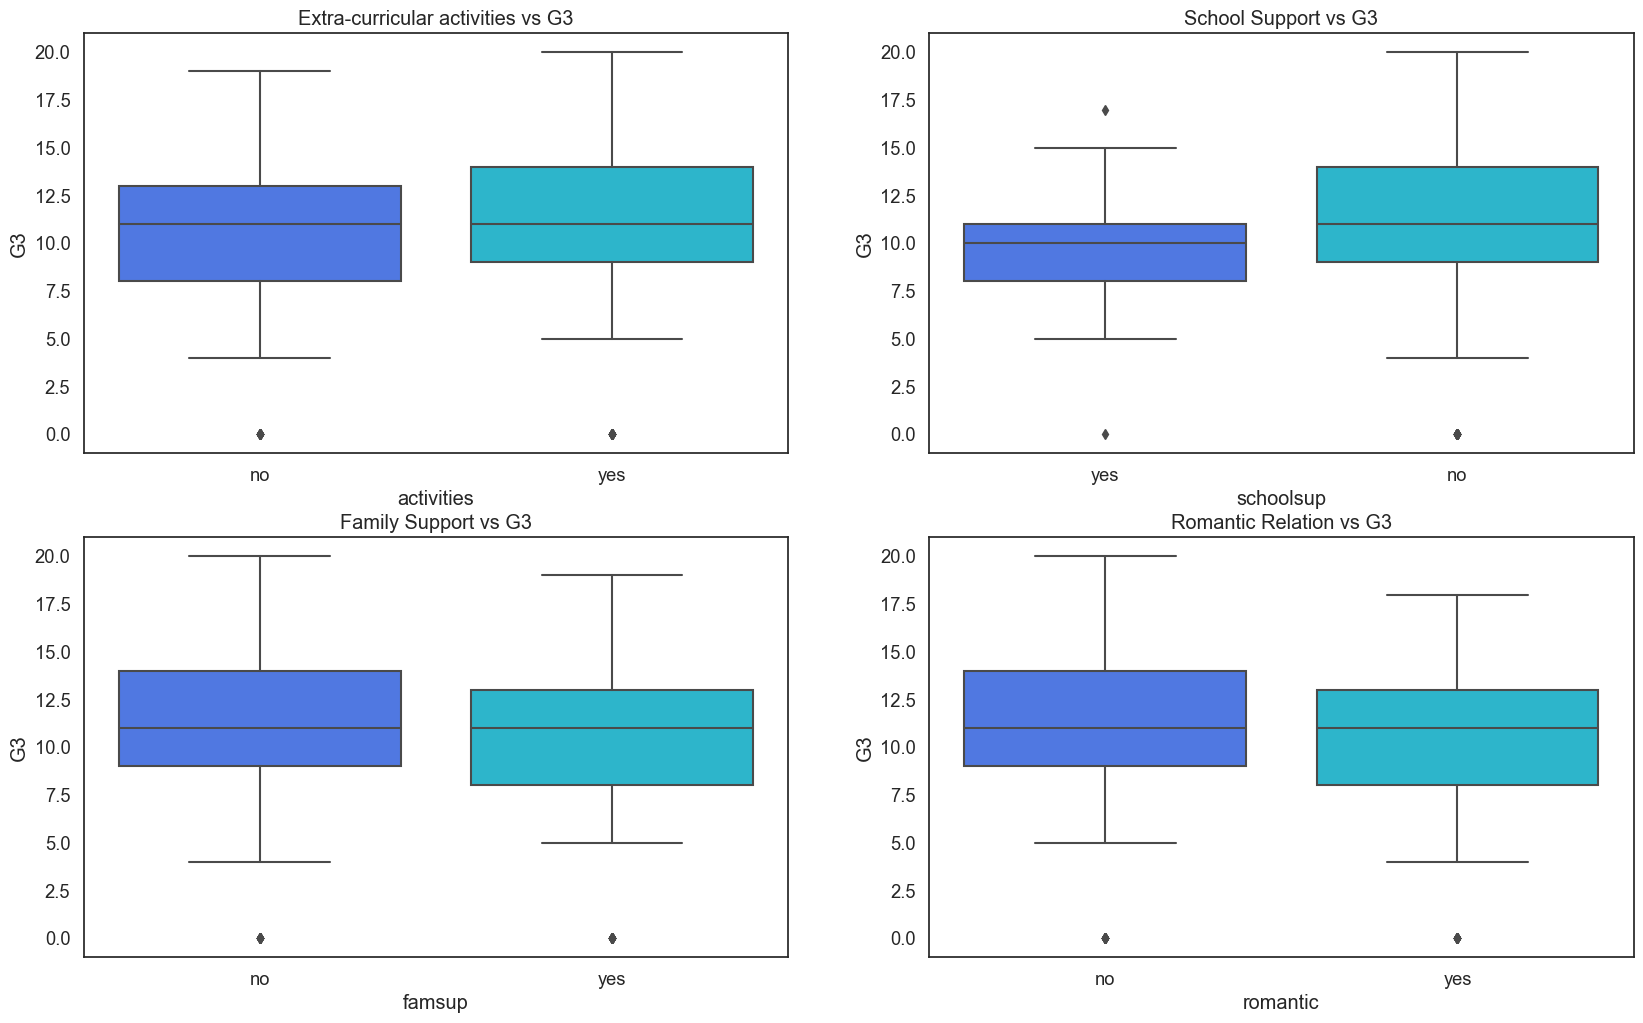

In [9]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
sns.boxplot(x='activities', y='G3', data=data).set_title('Extra-curricular activities vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='schoolsup', y='G3', data=data).set_title('School Support vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='famsup', y='G3', data=data).set_title('Family Support vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3', data=data).set_title('Romantic Relation vs G3')

## Behavioral

Text(0.5, 1.0, 'Walc vs G3')

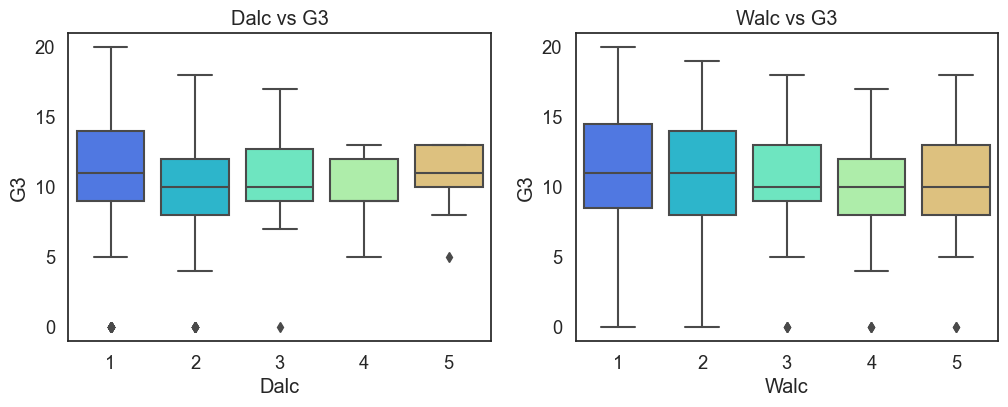

In [10]:
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=data).set_title('Dalc vs G3')
fig.add_subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=data).set_title('Walc vs G3')

Text(0.5, 1.0, 'romantic vs G3')

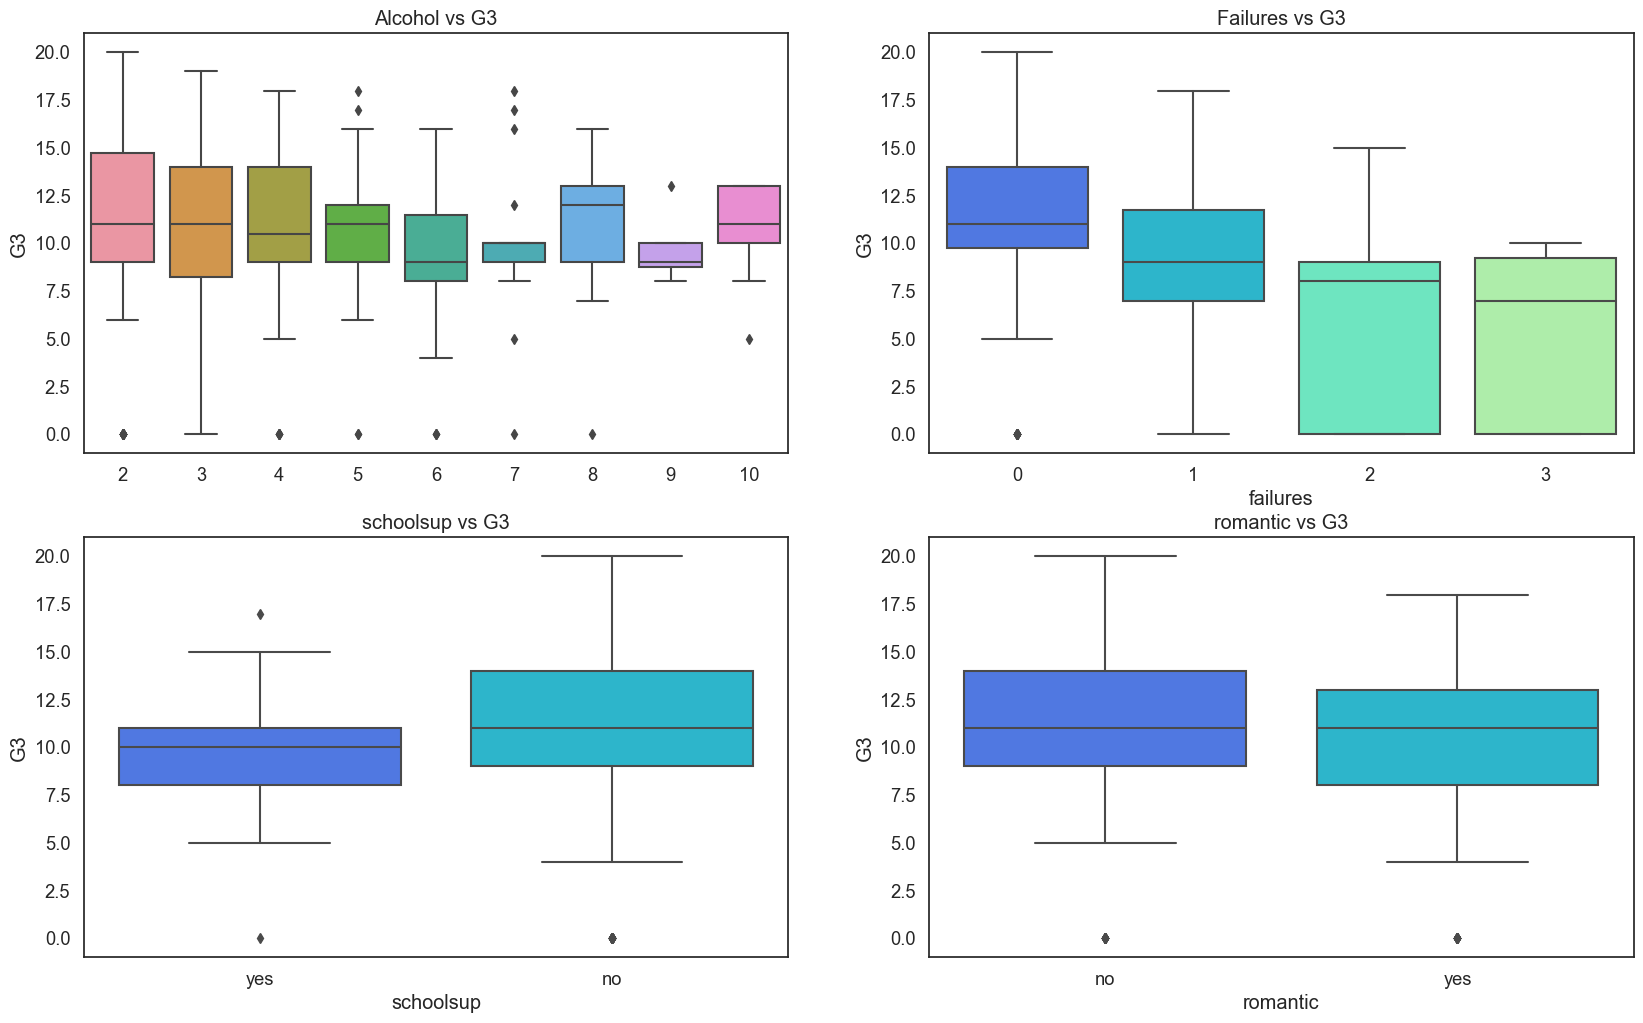

In [11]:
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(2, 2, 1)
alc = data['Dalc'] + data['Walc']
sns.boxplot(x=alc, y='G3',  data=data).set_title('Alcohol vs G3')
fig.add_subplot(2, 2, 2)
sns.boxplot(x='failures', y='G3',  data=data).set_title('Failures vs G3')
fig.add_subplot(2, 2, 3)
sns.boxplot(x='schoolsup', y='G3',  data=data).set_title('schoolsup vs G3')
fig.add_subplot(2, 2, 4)
sns.boxplot(x='romantic', y='G3',  data=data).set_title('romantic vs G3')

Text(0.5, 1.0, 'G2 versus G3')

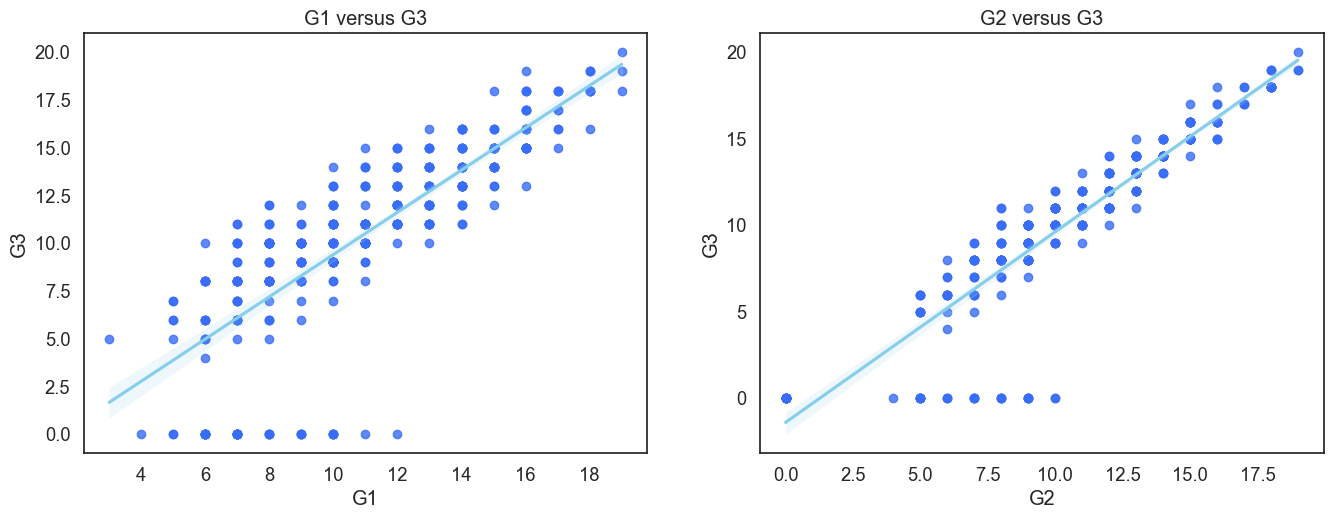

In [12]:
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(2, 2, 1)
sns.regplot(x='G1', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G1 versus G3')
fig.add_subplot(2, 2, 2)
sns.regplot(x='G2', y='G3', data=data, line_kws={'color': 'skyblue'}).set_title('G2 versus G3')

## Pre-Processsing

In [13]:
# read data
data = pd.read_csv("data/student-mat.csv")

# binary_mapping
data['school'] = data['school'].map({'GP':0, 'MS':1})
data['sex'] = data['sex'].map({'F':0, 'M':1})
data['famsize'] = data['famsize'].map({'GT3':0, 'LE3':1})
data['address'] = data['address'].map({'R':0, 'U':1})
data['Pstatus'] = data['Pstatus'].map({'A':0, 'T':1})

binary_mapping = {'yes':1, 'no':0}
data['schoolsup'] = data['schoolsup'].map(binary_mapping)
data['famsup'] = data['famsup'].map(binary_mapping)
data['paid'] = data['paid'].map(binary_mapping)
data['activities'] = data['activities'].map(binary_mapping)
data['nursery'] = data['nursery'].map(binary_mapping)
data['higher'] = data['higher'].map(binary_mapping)
data['internet'] = data['internet'].map(binary_mapping)
data['romantic'] = data['romantic'].map(binary_mapping)

# level-encoding
job_encoding = {'other':0, 'at_home': 1, 'services':2, 'health': 3, 'teacher': 4}
data['Mjob'] = data['Mjob'].map(job_encoding)
data['Fjob'] = data['Fjob'].map(job_encoding)
data['reason'] = data['reason'].map({'other': 0, 'home': 1, 'reputation': 2, 'course': 3})
data['guardian'] = data['guardian'].map({'other': 0, 'mother': 1, 'father': 2})

# combine Dalc and Walc into alc
data.loc[:,'alc']= data['Dalc'] + data['Walc']
# drop Dalc and Walc 
data = data.drop(columns=['Dalc', 'Walc'])
# drop G1 and G2
data = data.drop(columns=['G1', 'G2'])

data.head(3)
data.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
health        int64
absences      int64
G3            int64
alc           int64
dtype: object

In [14]:
# data.isna().sum()

In [15]:
X = data
y = data.G3

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(score_func=chi2, k=10)
k_best.fit(X, y)
df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score.sort_values(ascending=False)[1:6]

absences     648.166848
failures     140.934898
alc           41.036997
Fjob          32.603524
schoolsup     28.319018
dtype: float64

In [17]:
features_selected = df_score.nlargest(3).index
features_selected

Index(['G3', 'absences', 'failures'], dtype='object')

In [18]:
# train = split
from sklearn.model_selection import train_test_split, KFold, cross_val_score
k_fold = KFold(n_splits=10, random_state=1, shuffle=True)
train, test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G3,alc
23,0,1,16,1,1,1,2,2,0,0,...,1,1,0,5,4,4,5,0,12,6
296,0,0,19,1,0,1,4,4,3,0,...,1,1,0,2,3,4,2,0,0,5
13,0,1,15,1,0,1,4,3,4,0,...,1,1,0,5,4,3,3,2,11,3
249,0,1,16,1,0,1,0,2,0,0,...,1,1,0,4,3,2,5,0,15,6
61,0,0,16,1,0,1,1,1,2,2,...,1,1,1,5,5,5,5,6,11,10


In [19]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import Ridge
# classifiers = {
#     'Linear Regression' : LinearRegression(),
#     'Lasso': Lasso(),
#     'Ridge': Ridge(),
# }

# for key, clf in classifiers.items():
#     print(key, clf)
#     score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
#     rmse = np.sqrt(-score)
#     rmse_score = np.mean(rmse)
#     print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

In [20]:
# lm_fit = LinearRegression().fit(X_train, y_train)
# lm_fit.coef_

In [21]:
# pred_score = lasso_fit.predict(X[selected])
# df_res = pd.DataFrame([pred_score,y], index=["pred","true"]).T
# df_res.loc[pred_score < 12] = 0
# df_res.loc[pred_score >= 12] = 1
# y[y < 12] = 0
# y[y >= 12] = 1
# # df_res
# np.mean(df_res.pred == df_res.true)

# Linear Regression Model

In [22]:
train = pd.DataFrame(train)
# train.head()

#### G3 ~  absences * failures  + schoolsup + romantic

In [23]:
df_score.sort_values(ascending=False)[1:8]

absences     648.166848
failures     140.934898
alc           41.036997
Fjob          32.603524
schoolsup     28.319018
Mjob          28.144005
romantic      20.089526
dtype: float64

In [24]:
import statsmodels.formula.api as smf
# function to test prediction accuracy
def acc(lm, _Xtest, _ytest):
    pred_test = lm.predict(_Xtest)
    data = pd.concat([pred_test, _ytest], axis = 1)
    test_res = pd.DataFrame(data, columns=["predicted", "actual"], dtype="float64")
    test_res[pred_test < 12],test_res[pred_test >= 12] = 0,1
    test_res[pred_test < 6],test_res[pred_test >= 12] = 0,1
    y_test[y_test < 12],y_test[y_test >= 12] = 0,1
    return np.mean(test_res.predicted == test_res.actual)

# function to format and print result
def display_res(lm_formula):
    lm = smf.ols(formula = lm_formula, data=train).fit()
    r2 = lm.rsquared
    acc_test = acc(lm, test, y_test)
    acc_full = acc(lm, X, y)
    print(f"{lm_formula}\nR-Squared = {r2:.4f}\nAccuracy on test set: {acc_test}\tfull dataset: {acc_full}")

In [25]:
lm0 = 'G3 ~ absences'
display_res(lm0)

G3 ~ absences
R-Squared = 0.0016
Accuracy on test set: 1.0	full dataset: 1.0


In [26]:
lm1 = 'G3 ~ absences + failures'
display_res(lm1)

G3 ~ absences + failures
R-Squared = 0.1237
Accuracy on test set: 1.0	full dataset: 1.0


In [27]:
lm2 = 'G3 ~ absences + failures  + alc'
display_res(lm2)

G3 ~ absences + failures  + alc
R-Squared = 0.1238
Accuracy on test set: 1.0	full dataset: 1.0


In [28]:
lm3 = 'G3 ~ absences + failures + alc + Fjob'
display_res(lm3)

G3 ~ absences + failures + alc + Fjob
R-Squared = 0.1300
Accuracy on test set: 1.0	full dataset: 1.0


In [29]:
lm4 = 'G3 ~ absences + failures + schoolsup + romantic'
display_res(lm4)

G3 ~ absences + failures + schoolsup + romantic
R-Squared = 0.1517
Accuracy on test set: 1.0	full dataset: 1.0
